# 04- Analysis of Head-to-Head LDC Fitness Competitions¶
##  Growth analysis of 7942_0863 and WT in Experimental Conditions

So, se decided to focus on the most promissing strain synpcc7942_0863 and reperform the high light (150uE) experiment again but instrad of plating on to 24 well plates with 20 ul of serial dilutions, we would plate 100 ul onto a full petri plate.

### Load Data

In [1]:
# Importing intrinsic libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import os
os.chdir("..")

In [2]:
# Loading Pandas DataFrame:
data4 = pd.read_csv("Datasets/growth-0863.csv")
data4.head()

,strain,day,condition,od
0,WT,day 0,LDC,0.020
1,WT,day 0,LDC,0.020
2,WT,day 0,LDC,0.020
3,WT,day 2,LDC,0.053
4,WT,day 2,LDC,0.041


# Lets now look at the competitions of KO mutant vs KO mutant from LDC conditions: 

### Make a box plot
Plot the individual replicate data points and group the timepoints together for each strain.
First start the the data from competitions flasks incubated in 12-12 LDC (~150 uE)

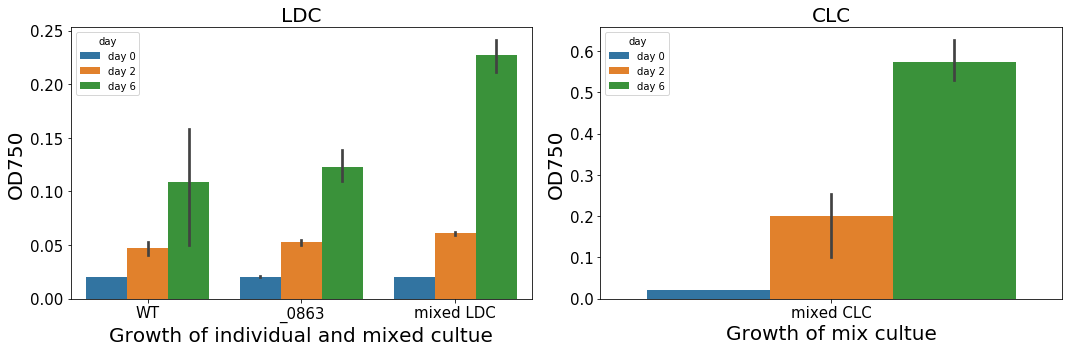

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
barplotgrowth1 = sns.barplot(  y="od", x= "strain", hue="day", data=data4[data4.condition == "LDC"],  orient='v' , ax=axes[0])
barplotgrowth2 = sns.barplot(  y="od", x= "strain", hue="day", data=data4[data4.condition == "CLC"],  orient='v' , ax=axes[1])

# control axis labels
barplotgrowth1.axes.set_title("LDC",fontsize=20)
barplotgrowth1.set_xlabel("Growth of individual and mixed cultue",fontsize=20)
barplotgrowth1.set_ylabel("OD750",fontsize=20)
barplotgrowth1.tick_params(labelsize=15)

barplotgrowth2.axes.set_title("CLC",fontsize=20)
barplotgrowth2.set_xlabel("Growth of mix cultue",fontsize=20)
barplotgrowth2.set_ylabel("OD750",fontsize=20)
barplotgrowth2.tick_params(labelsize=15)


plt.tight_layout()


pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

WT_day 0 v.s. _0863_day 0: t-test independent samples, P_val=3.739e-01 stat=-1.000e+00
WT_day 2 v.s. _0863_day 2: t-test independent samples, P_val=2.302e-01 stat=-1.414e+00
WT_day 6 v.s. _0863_day 6: t-test independent samples, P_val=6.906e-01 stat=-4.281e-01


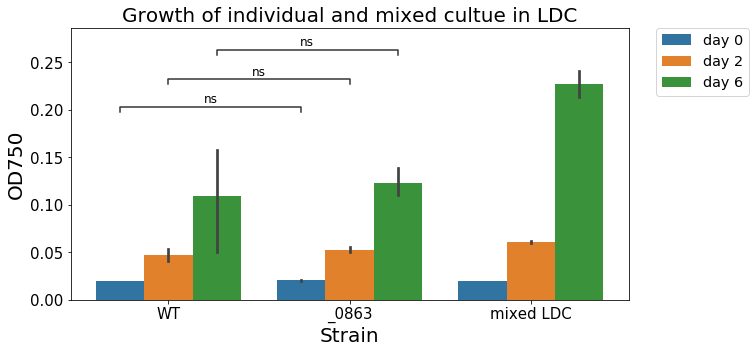

In [6]:
plt.figure(figsize=(10,5))
barplotgrowth3 = sns.barplot(y="od", x= "strain", hue="day", data=data4[data4.condition == "LDC"])

# control axis labels
barplotgrowth3.axes.set_title("Growth of individual and mixed cultue in LDC",fontsize=20)
barplotgrowth3.set_xlabel("Strain",fontsize=20)
barplotgrowth3.set_ylabel("OD750",fontsize=20)
barplotgrowth3.tick_params(labelsize=15)

stat1 = add_stat_annotation(barplotgrowth3, data=data4[data4.condition == "LDC"], y="od", x= "strain", hue="day",
                    boxPairList=[(("WT", "day 0"), ("_0863", "day 0")),
                                 (("WT", "day 2"), ("_0863", "day 2")),
                                 (("WT", "day 6"), ("_0863", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='inside', verbose=2, fontsize='large', 
                           lineYOffsetToBoxAxesCoord=.7)

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# Fix the legand
# Get the handles and labels. 
handles, labels = barplotgrowth3.get_legend_handles_labels()
# When creating the legend, only use the first two elements to effectively remove the last two.
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='x-large', title_fontsize='40')


## Click here to continue to <a href="05-Graph Summary.ipynb"> "Graph Summary Page" </a>

### Or if you want to print the figures:

In [7]:
barplotgrowth3 = barplotgrowth3.get_figure()

barplotgrowth3.savefig('Figures/barplotgrowth3.png', dpi=400, bbox_inches="tight")
